In [1]:
# Vorverarbeitung und Visualisierung des Wikipedia_Textdatensatzes"

In [2]:
# --- Warnungen & Anzeigeeinstellungen ---
from warnings import filterwarnings
filterwarnings('ignore')  

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)        
pd.set_option('display.width', 200)               
pd.set_option('display.float_format', lambda x: '%.2f' % x)  

# --- Datenverarbeitung & Berechnung ---
from collections import Counter  

# --- Datenvisualisierung ---
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# --- Textverarbeitung & NLP ---
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob

# --- Hilfsmittel ---
import string

In [3]:
df = pd.read_csv(r"C:\Users\nesri\repos\wiki_nlp\wiki_data.csv")

In [4]:
df.head()

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


In [5]:
# Unnötige Index-Spalte entfernen
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# Aufgabe 1: Textvorverarbeitung durchführen
# Schritt 1: Eine Funktion 'clean_text' zur Textvorverarbeitung erstellen.
# Die Funktion soll:
# - Groß-/Kleinschreibung vereinheitlichen,
# - Satzzeichen entfernen,
# - Numerische Ausdrücke herausfiltern.

def clean_text(dataframe, col):
    
   # Für die Umwandlung in Kleinbuchstaben
   dataframe[col] = dataframe[col].str.lower()

   # Zum Entfernen von Satzzeichen
   dataframe[col] = dataframe[col].str.replace(r"[^\w\s]", " ", regex=True)

   # Zum Entfernen von Zeilenumbrüchen
   dataframe[col] = dataframe[col].str.replace(r"\n+", " ", regex=True)

   # Zum Entfernen von Zahlen
   dataframe[col] = dataframe[col].str.replace(r"\d+", " ", regex=True)

   # Um mehrere Leerzeichen zu einem Leerzeichen zu machen und führende/nachgestellte Leerzeichen zu entfernen
   dataframe[col] = dataframe[col].str.replace(r"\s+", " ", regex=True).str.strip()

   return dataframe[col]

In [7]:
# Schritt 2: Wenden Sie die erstellte Funktion auf alle Texte im Datensatz an.
# Um die Funktion auf alle Texte anzuwenden
df["text"] = clean_text(df, "text")
df.head()

,text
0,anovo anovo formerly a novo is a computer serv...
1,battery indicator a battery indicator also kno...
2,bob pease robert allen pease august â â june w...
3,cavnet cavnet was a secure military forum whic...
4,clidar the clidar is a scientific instrument u...


In [8]:
# Schritt 3: Schreiben Sie eine Funktion namens 'remove_stopwords', die beim Merkmalsextrahieren unwichtige Wörter (Stoppwörter) entfernt.
def remove_stopwords(dataframe, col):
    sw = stopwords.words('english')
    dataframe[col] = dataframe[col].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    return dataframe[col]

In [9]:
# Schritt 4: Wenden Sie die erstellte Funktion auf alle Texte im Datensatz an.
df["text"] = remove_stopwords(df,"text")
df.head()

,text
0,anovo anovo formerly novo computer services co...
1,battery indicator battery indicator also known...
2,bob pease robert allen pease august â â june a...
3,cavnet cavnet secure military forum became ope...
4,clidar clidar scientific instrument used measu...


In [10]:
# Schritt 5: Finden Sie Wörter, die selten vorkommen (z. B. weniger als 1000 oder 2000 Mal), und entfernen Sie diese Wörter aus dem Text.
# Um die Wortfrequenzen zu berechnen
all_words = pd.Series(' '.join(df['text']).split()).value_counts()
all_words

used           29470
also           22969
â              22517
use            17090
one            16953
               ...  
husker             1
retrogaming        1
amped              1
fiâ                1
esof               1
Name: count, Length: 137047, dtype: int64

In [11]:
# Um Wörter zu finden, die weniger als 1000 Mal vorkommen
rare_words_1000 = set(all_words[all_words < 1000].index)
print(f"{len(rare_words_1000)} adet rare words bulundu (1000’den az).\n")

# Um Wörter zu finden, die weniger als 2000 Mal vorkommen
rare_words_2000 = set(all_words[all_words < 2000].index)
print(f"{len(rare_words_2000)} adet rare words bulundu (2000’den az).\n")

# Um seltene Wörter aus den Texten zu entfernen und in separaten Spalten zu speichern

df["text_filtered_1000"] = df["text"].apply(lambda x: " ".join(word for word in x.split() if word not in rare_words_1000))

df["text_filtered_2000"] = df["text"].apply(lambda x: " ".join(word for word in x.split() if word not in rare_words_2000))

df.head()

136092 adet rare words bulundu (1000’den az).

136699 adet rare words bulundu (2000’den az).



,text,text_filtered_1000,text_filtered_2000
0,anovo anovo formerly novo computer services co...,computer services company based france founded...,computer services company based founded public...
1,battery indicator battery indicator also known...,battery battery also known battery device info...,also known device information usually state im...
2,bob pease robert allen pease august â â june a...,august â â june analog integrated circuit desi...,â â circuit design technical designed several ...
3,cavnet cavnet secure military forum became ope...,military became april part allows fast access ...,became part allows access ground used us data ...
4,clidar clidar scientific instrument used measu...,scientific instrument used lower camera turn l...,used lower light form used light device usuall...


In [12]:
# Schritt 6: Texte tokenisieren und die Ergebnisse beobachten.
# Die Tokenisierung wird nur auf 'text_filtered_2000' durchgeführt
df["text_filtered_2000"]= df["text_filtered_2000"].apply(lambda x: TextBlob(x).words)
df["text_filtered_2000"].head()

0    [computer, services, company, based, founded, ...
1    [also, known, device, information, usually, st...
2    [â, â, circuit, design, technical, designed, s...
3    [became, part, allows, access, ground, used, u...
4    [used, lower, light, form, used, light, device...
Name: text_filtered_2000, dtype: object

In [13]:
# Schritt 7: Führen Sie die Lemmatisierung durch.
# Die Lemmatisierung wird nur auf 'text_filtered_2000' durchgeführt
# Lemmatisierung basierend auf Nomen
# Um das WordList-Objekt in einen String umzuwandeln
df["text_filtered_2000"] = df["text_filtered_2000"].apply(lambda x: " ".join(x) if not isinstance(x, str) else x)

df["text_filtered_2000"] = df["text_filtered_2000"].apply( lambda x: " ".join([Word(word).lemmatize() for word in x.split()]) if isinstance(x, str) else "")

df["text_filtered_2000"].head()

0    computer service company based founded public ...
1    also known device information usually state im...
2    â â circuit design technical designed several ...
3    became part allows access ground used u data s...
4    used lower light form used light device usuall...
Name: text_filtered_2000, dtype: object

In [14]:
# Um alle Wörter korrekt zu lemmatisieren, müssen wir eine POS-Tagging (Wortartkennzeichnung) durchführen.

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default isim

# POS-basierte Lemmatisierung nur für String-Werte

df["text_filtered_2000_lemmatized"] = df["text_filtered_2000"].apply(lambda x: " ".join([lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tag(x.split())]) if isinstance(x, str) else "")

df["text_filtered_2000_lemmatized"].head()

0    computer service company base found public sma...
1    also know device information usually state imp...
2    â â circuit design technical design several ma...
3    become part allow access ground use u data sca...
4    use low light form use light device usually im...
Name: text_filtered_2000_lemmatized, dtype: object

In [15]:
# Aufgabe 2: Daten visualisieren
# Schritt 1: Berechnen Sie die Häufigkeiten der Begriffe im Text.

# Berechnung der Wortfrequenzen (mit pd.value_counts)
tf = df["text_filtered_2000"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf = tf.sort_values("tf", ascending=False)  
tf.head()

,words,tf
13,used,29470.00
14,system,27172.00
25,also,22969.00
57,â,22517.00
26,use,17090.00


In [16]:
# 2. Methode
# Berechnung der Wortfrequenzen (mit Counter)
# Um die Wortfrequenzen jeder Zeile zu zählen und zu summieren
word_frequencies_list = df["text_filtered_2000"].apply(lambda text: Counter(text.split())).sum(axis=0)

# In ein DataFrame umwandeln
frequency_table = pd.Series(word_frequencies_list).reset_index()
frequency_table.columns = ['Word', 'Frequency']

# Nach Häufigkeit sortieren
frequency_table = frequency_table.sort_values('Frequency', ascending=False)
frequency_table.head()

,Word,Frequency
29,used,29470
27,system,27172
12,also,22969
55,â,22517
49,use,17090


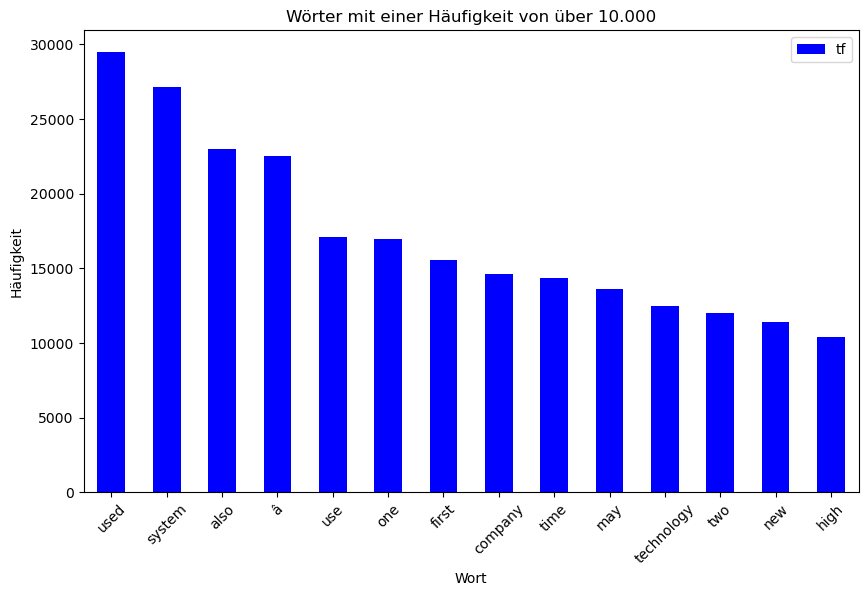

In [17]:
# Schritt 2: Erstellen Sie ein Balkendiagramm für die im vorherigen Schritt ermittelten Wortfrequenzen.

# Um Wörter mit einer Häufigkeit von mehr als 10.000 im Balkendiagramm zu visualisieren
tf[tf["tf"] > 10000].plot.bar(x="words", y="tf", figsize=(10,6), color='blue')

# Titel und Achsenbeschriftungen
plt.title("Wörter mit einer Häufigkeit von über 10.000", fontsize=12)
plt.xlabel("Wort")
plt.ylabel("Häufigkeit")
plt.xticks(rotation=45)
plt.show()

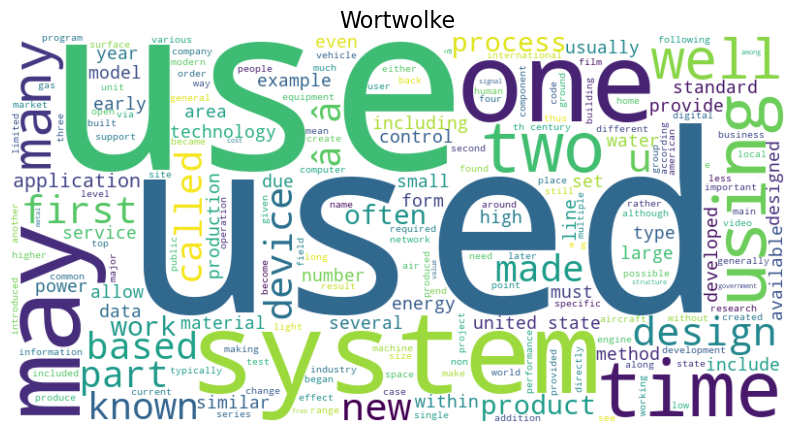

In [18]:
# Schritt 3: Visualisierung der Wörter mit WordCloud.
# Alle Wörter zu einem String zusammenfügen
all_text = " ".join(df["text_filtered_2000"])

# WordCloud erstellen
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Visualisierung
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wortwolke", fontsize=16)
plt.show()


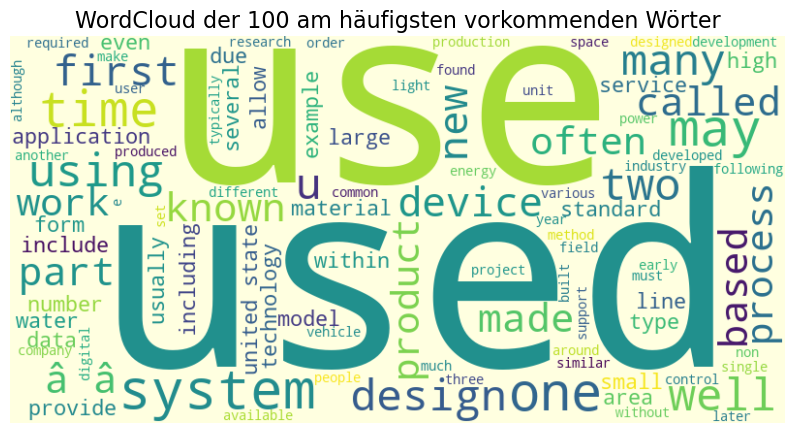

In [19]:
# WordCloud der 100 am häufigsten vorkommenden Wörter
wordcloud = WordCloud(max_words=100, width=800, height=400, background_color="lightyellow").generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud der 100 am häufigsten vorkommenden Wörter", fontsize=16)
plt.show()

In [20]:
# Aufgabe 3: Alle Schritte in einer Funktion zusammenfassen

# Schritt 1: Textvorverarbeitung durchführen
# Schritt 2: Visualisierung als Funktionsargument integrieren
# Schritt 3: Docstring mit Beschreibung der Funktion schreiben

df = pd.read_csv(r"C:\Users\nesri\repos\wiki_nlp\wiki_data.csv")

df.drop('Unnamed: 0', axis=1, inplace=True)

def preprocess_and_visualize(df, text_column, top_n=None, rare_threshold=None, max_words_wordcloud=None):
    """
    Funktion zur Textvorverarbeitung und Visualisierung.

    Schritte:
    1. Wandelt Text in Kleinbuchstaben um und entfernt Satzzeichen.
    2. Entfernt Stopwords.
    3. Entfernt Wörter, die seltener als 'rare_threshold' vorkommen (optional).
    4. Tokenisierung und Lemmatisierung durchführen.
    5. Berechnet die Häufigkeiten der top_n häufigsten Wörter und visualisiert diese mit einem Balkendiagramm.
       Wenn top_n=None, werden alle Wörter angezeigt.
    6. Erstellt eine WordCloud (max_words_wordcloud kann die Anzahl der Wörter begrenzen).

    Parameter:
    df : pandas DataFrame
        DataFrame, das die Textspalte enthält.
    text_column : str
        Name der zu verarbeitenden Textspalte.
    top_n : int oder None, default=None
        Anzahl der häufigsten Wörter, die im Balkendiagramm angezeigt werden. None zeigt alle Wörter.
    rare_threshold : int, default=None
        Wenn angegeben, werden Wörter, die seltener als dieser Wert vorkommen, aus dem Text entfernt.
    max_words_wordcloud : int, default=None
        Maximale Anzahl an Wörtern in der WordCloud. None verwendet alle Wörter.

    Rückgabewert:
    df : pandas DataFrame
        DataFrame mit bereinigter und verarbeiteter Textspalte.
    """

    # Textbereinigung
    # Kleinbuchstaben
    df[text_column] = df[text_column].str.lower()

    # Satzzeichen entfernen
    df[text_column] = df[text_column].str.replace(r"[^\w\s]", " ", regex=True)
    
    # Zeilenumbrüche entfernen
    df[text_column] = df[text_column].str.replace(r"\n+", " ", regex=True)
    
    # Zahlen entfernen
    df[text_column] = df[text_column].str.replace(r"\d+", " ", regex=True)
    
    # Mehrfachleerzeichen reduzieren und führende/nachgestellte Leerzeichen entfernen
    df[text_column] = df[text_column].str.replace(r"\s+", " ", regex=True).str.strip()
    
    # Stopwords entfernen
    stop_words = set(stopwords.words("english"))
    df[text_column] = df[text_column].apply(lambda x: " ".join([w for w in x.split() if w not in stop_words]))

    # Filter für seltene Wörter
    if rare_threshold is not None:
        all_words = " ".join(df[text_column]).split()
        word_counts = Counter(all_words)
        rare_words = {word for word, count in word_counts.items() if count < rare_threshold}
    df[text_column] = df[text_column].apply(lambda x: " ".join([w for w in x.split() if w not in rare_words]))

    # Lemmatisierung
    lemmatizer = WordNetLemmatizer()
    df[text_column] = df[text_column].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in x.split()]))

    # Balkendiagramm
    tf = df[text_column].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
    tf.columns = ["words", "tf"]
    tf = tf.sort_values("tf", ascending=False)
    if top_n is not None:
        tf = tf.head(top_n)

    plt.figure(figsize=(10,6))
    plt.bar(tf["words"], tf["tf"], color='skyblue')
    plt.xticks(rotation=45)
    plt.xlabel("Wort")
    plt.ylabel("Häufigkeit")
    title_text = f"Wortfrequenzverteilung"
    if top_n is not None:
        title_text += f" (Top {top_n})"
    if rare_threshold is not None:
        title_text += f" - Selten < {rare_threshold}"
    plt.title(title_text)
    plt.show()

    # WordCloud (alle Wörter oder max_words_wordcloud)
    all_text = " ".join(df[text_column])
    wordcloud = WordCloud(width=800, height=400, background_color="lightgray", max_words=max_words_wordcloud).generate(all_text)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    wc_title = "WordCloud"
    if max_words_wordcloud is not None:
        wc_title += f" - Max {max_words_wordcloud} Wörter"
    plt.title(wc_title, fontsize=12, color='blue')
    plt.show()

    return df



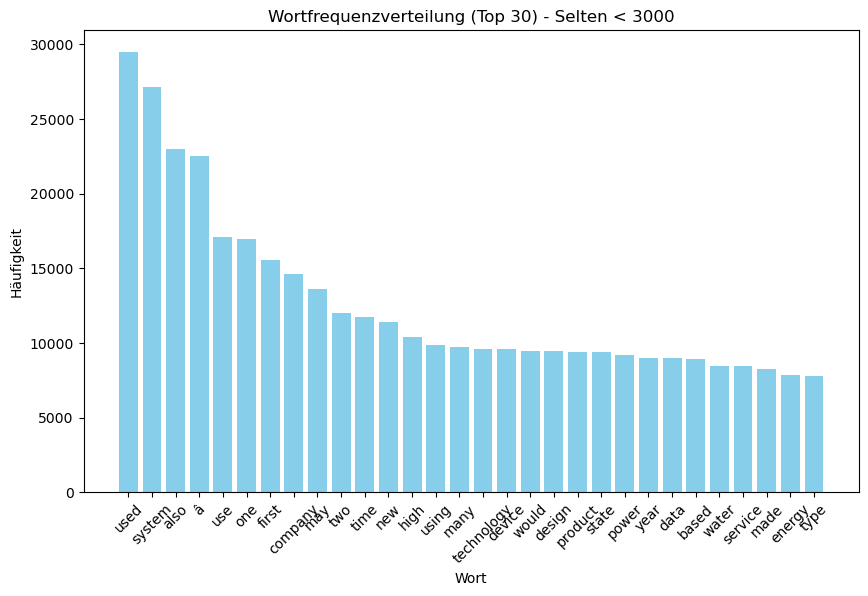

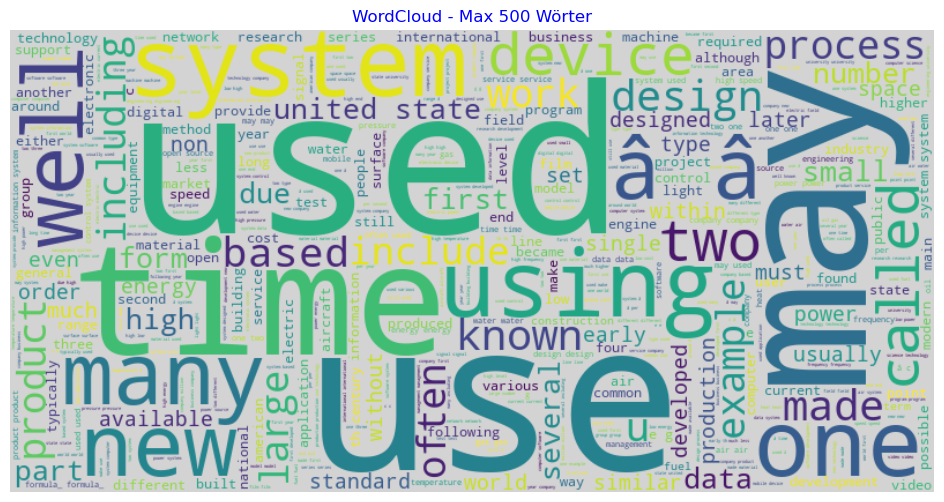

In [21]:
df = preprocess_and_visualize(df, text_column="text", top_n=30, rare_threshold=3000, max_words_wordcloud=500)